# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>

## <span style="color:blue">  Numerical exercises 1</span>

### Exercise 01.1


For the compilation of the exercises we were given a pseudo-random number generator (that uses the so-called **RANdom New York University procedure (Rannyu)**). In further exercises, the random numbers will be used as if they were distributed uniformly in the interval $[0, 1)$. Here, the assumption of a uniform distribution should be verfied (or, more precisely: we will see that the tests we conduct at least do not contradict this assumption).

For the first test, we recall that the **expectation value** of a uniform distribution is given by:
$$\langle r \rangle = \int_0^1 r dr = 1/2.$$
To estimate the expectation value of the Rannyu generator, we generate $M_{max} = 10^5$ random numbers $r_i$ ($i \in \{1, ..., M_{max}\}$), further refered to as number of throws. 

In principle, we could simply calculate the progressive mean of the obtained numbers for increasing number of throws $M$ and control if a convergence towards $1/2$ is observed. In doing so, we could estimate the uncertainty on the progressive mean by using the well-known formula for the uncertainty on a sample mean. However, this would be unsatisfying because the generated sequence of "random" numbers has a certain correlation length and our uncertainty estimation would be incorrect (In particular, correlational effects will become important in further exercises regarding the Metropolis algorithm). 

In order to account for the correlation, we divide the generated random numbers into $N_{max}=100$ blocks, each containing $L = M_{max} / N_{max} = 1500$ throws. Then, we compute the average for each block and take the obtained values as our correlation-free (approximately because correlation is still present at the edges of the blocks) variables.
For these variables, we can use our well-known uncertainty estimation:
$$\frac{\sigma}{\sqrt{N-1}} \simeq \sqrt{\frac{1}{N-1} \left[ \frac{1}{N} \sum_{i=1}^N r^2_i - \left( \frac{1}{N} \sum_{i=1}^N r_i \right)^2 \right]},$$
where $N \in \{1, ..., N_{max}\}$.
This method is called **blocking method**. Note, that here $r_i$ denotes the average of the i-th. block that should not be confused with one of the $M_{max}$ single random numbers from above. We do so in order to avoid a too complex notation.

In the figure below, we visualize the estimated expectation value $\langle r \rangle $ of the random number generator as a function of the number of throws $M$ that are used for the computation of the progressive mean. We observe that the estimated expectation value converges to the value of a uniform distribution, indicated by the red line. The uncertainty of the estimated expectation value decreases as the number of throws $M$ increases because more and more blocks are considered for the calculation of the progressive mean.  

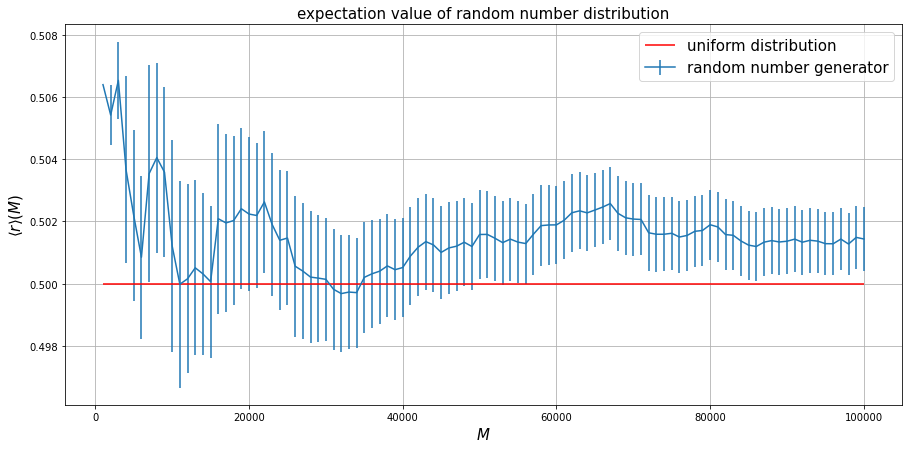

In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
M, r_mean, r_mean_error = np.loadtxt("data/r_vs_M.txt", delimiter=',', skiprows=1, unpack = 'True')
plt.errorbar(M, r_mean, r_mean_error, label='random number generator')
plt.hlines(0.5, min(M), max(M), color='r', label='uniform distribution')
plt.xlabel(r"$M$", size=15)
plt.ylabel(r"$\langle r \rangle(M)$", size=15)
plt.title("expectation value of random number distribution", size=15)
plt.legend(fontsize=15)
plt.grid()
plt.show()

For the second test, we recall that the **variance** $\sigma^2$ of a uniform distribution can be computed to:
$$\sigma^2 = \langle (r - \langle r \rangle)^2 \rangle = \int_0^1 (r-1/2)^2 dr = 1/12,$$
where we used that $\langle r \rangle = 1/2$. We again choose $M_{max}=10^5$ throws divided into $N_{max} = 100$ blocks. In the figure, we plot the progressive mean for the variance as a function of the number of throws $M$. We observe that the estimated variance of the random number generator converges to its expected value of $1/12$, as indicated by the red line.

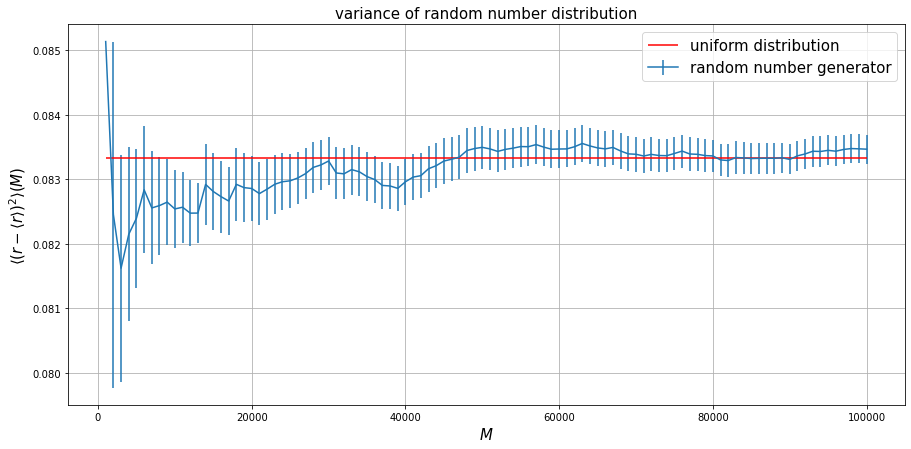

In [3]:
plt.figure(figsize=(15, 7))
M, r_var, r_var_error = np.loadtxt("data/r_var_vs_M.txt", delimiter=',', skiprows=1, unpack = 'True')
plt.errorbar(M, r_var, r_var_error, label='random number generator')
plt.hlines(1/12, min(M), max(M), color='r', label='uniform distribution')
plt.xlabel(r"$M$", size=15)
plt.ylabel(r"$\langle (r - \langle r \rangle)^2 \rangle(M)$", size=15)
plt.title("variance of random number distribution", size=15)
plt.legend(fontsize=15)
plt.grid()
plt.show()

Finally, we apply **Pearson's cumulative test**. For this purpose, we divide the interval $[0, 1)$ into $N_{intervals} = 100$ subintervals, i.e. into $[0, 0.01)$, $[0.01, 0.02)$, ...
Now, we generate $n = 10^4$ random numbers and calculate 
$$\chi^2 = \sum_{i=1}^{N_{intervals}} \frac{\left( n_i - n/N_{intervals} \right)^2}{n/N_{intervals}},$$
where $n_i$ is the number of throws that fall into the i-th. subinterval. We repeat the calculation of $\chi^2$ $100$ times. 
Below, we visualize the obtained value of $\chi^2$ for each repetition. We can see that $\chi^2$ "oscillates" around its expected value of $\chi^2_{expect} = 100$ (see exercise description for detailed information on Pearson's cumulative test), which means that we donnot reject the null hypothesis that the Rannyu procedure generates uniformly distributed numbers.

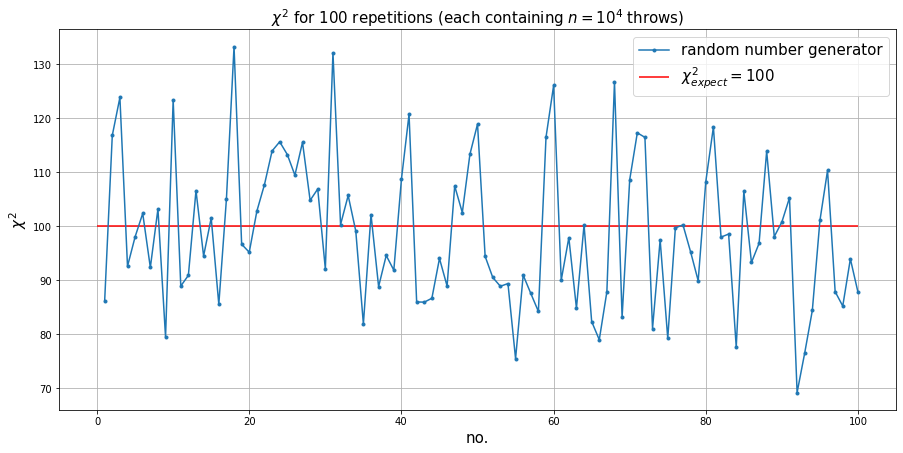

In [4]:
plt.figure(figsize=(15, 7))
chi2 = np.loadtxt("data/chi2.txt", delimiter=',', skiprows=1, unpack = 'True')
no = np.arange(1, 101, 1)
plt.plot(no, chi2, marker='.', label="random number generator")
plt.hlines(100, 0, 100, color='r', label=r"$\chi^2_{expect} = 100$")
plt.xlabel("no.", size=15)
plt.ylabel(r"$\chi^2$", size=15)
plt.title(r"$\chi^2$ for $100$ repetitions (each containing $n=10^4$ throws)", size=15)
plt.legend(fontsize=15)
plt.grid()
plt.show()

To put in a nutshell, we have shown that the expectation value as well as the variance of the random number generator are similar to those of a uniform distribution. Furthermore, "Pearson's cumulative test" did not give us a reason to reject the nullhypothesis that the random numbers of the Rannyu generator are distributed uniformly. So, for the following exercises, we are confident to proceed treating the random numbers as uniformly distributed in the interval $[0,1)$.

### Exercise 01.2

As we have seen above, the random number generator is a source of uniformly distributed variables in the interval $[0,1)$. But, what if we wanted to sample from a different distribution?

Well, there are several techniques to do so that we will also discuss in further exercise sheets. Here, we use the **method of the inversion of the cumulative distribution** to sample from an exponential distribution with probability density function $p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$ and $\lambda > 0$, as well as from a Lorentzian distribution $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$ and $\mu \in \mathbb{R}, \Gamma > 0$.

The inversion method states that if $y \in [0,1)$ is uniformly sampled (like the output of our random number generator), then $x = F^{-1}_x(y)$ is a random variable with probability density function $p_x(x) = \frac{dF_x(x)}{dx}$. In this context, $F$ is also called cumulative density function.

In the lecture notes, it is shown that the result for an exponential distribution is $x = -\frac{1}{\lambda}\ln(1-y)$. For a Lorentzian distribution, we obtain $x = \mu + \Gamma \tan [\pi (y - 1/2)]$.

Being able to sample from these different distributions, we want to discuss the **central limit theorem** - a key ingredient for many statistical analyses. It states that the sum $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ of $N$ statistically independent and identically distributed random variables $x_i$ tends to a normal distribution with expectation value $\mu$ and variance $\sigma^2 / N$ for $N \to \infty$, where $\mu$ and $\sigma^2$ are the first two moments of the distribution of $x_i$.

First, we check the central limit theorem for $10^4$ realizations of $S_N$ for $N=1, 2, 10, 100$ in the case, in which the $x_i$ are **sampled uniformly** in $[0,1)$. In the figure below, we plot the histograms of the probability density for the different number of terms $N$ in the sum. For $N=1$, we observe a uniform distribution as we would expect. Increasing $N$, the distribution in the histogram seems to converge to a normal distribution as predicted by the central limit theorem. We can check this by fitting the probability density for the case $N=100$ with a normal distribution. The fit parameters are: $\mu_{fit} \approx 0.500$ and $\sigma_{fit} \approx 0.0288$, which are very close to the expected values of $\mu_{uni} = 0.5$ and $\sigma_{uni} / \sqrt{N} = 1 / \sqrt{12 \times 100} \approx 0.0289$.

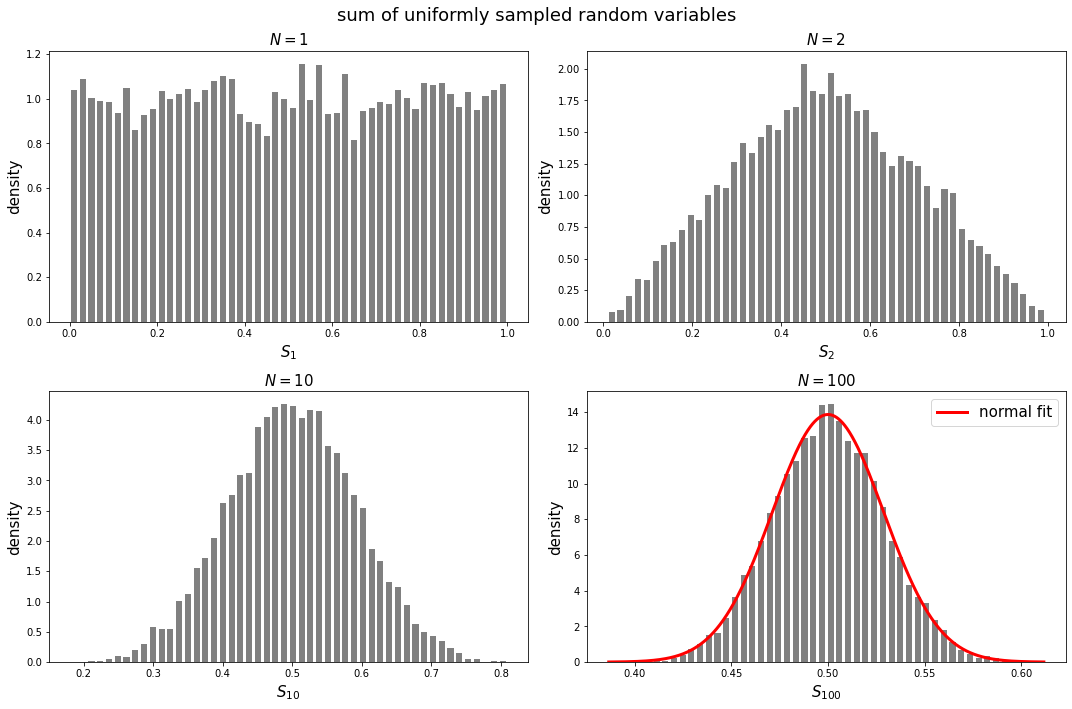

Parameters of fit for N = 100:
	mu_fit = 0.4999873025
	sigma_fit = 0.02876730183679717


In [5]:
from scipy.stats import norm

def plot_hist(data, ax_ij, N, n_bins, range=None):
    ''' plot histogram in given axis '''
    ax_ij.hist(data, bins=n_bins, rwidth=0.7, color='grey', range=range, density=True)
    ax_ij.set_xlabel(r"$S_{" + str(N) + r"}$", size=15)
    ax_ij.set_ylabel("density", size=15)
    ax_ij.set_title(r"$N=" + str(N) + r"$", size=15)

S_1, S_2, S_10, S_100 = np.loadtxt("data/uniform.txt", delimiter=',', skiprows=1, unpack = 'True')

n_bins = 50 # number of bins for all following histograms
fig, ax = plt.subplots(2, 2, figsize=(15,10))
fig.suptitle("sum of uniformly sampled random variables", size=18)

plot_hist(S_1, ax[0,0], N=1, n_bins=n_bins)
plot_hist(S_2, ax[0,1], N=2, n_bins=n_bins)
plot_hist(S_10, ax[1,0], N=10, n_bins=n_bins)
plot_hist(S_100, ax[1,1], N=100, n_bins=n_bins)

# fit case with N=100 terms
mu_fit, sigma_fit = norm.fit(S_100)
x_fit = np.linspace(min(S_100), max(S_100), 1000)
ax[1,1].plot(x_fit, norm.pdf(x_fit, mu_fit, sigma_fit), color='r', linewidth=3, label='normal fit')

fig.tight_layout()
plt.legend(fontsize=15)
plt.show()

print("Parameters of fit for N = 100:" + "\n\t" + "mu_fit = " + str(mu_fit) + "\n\t" + "sigma_fit = " + str(sigma_fit))

Now, we do the same analysis for $x_i$ that are sampled from an **exponential distribution** with $\lambda=1$. We observe a convergence to a normal distribution for increasing $N$ as expected by the central limit theorem. The fit parameters for $N=100$ are $\mu_{fit} \approx 0.999$ and $\sigma_{fit} \approx 0.0998$, which are also very close to their expected values of $\mu_{exp} = 1 / \lambda$ and $\sigma_{exp} / \sqrt{N} = 1 / \lambda / \sqrt{N} =  1 / \sqrt{100} \approx 0.1$.

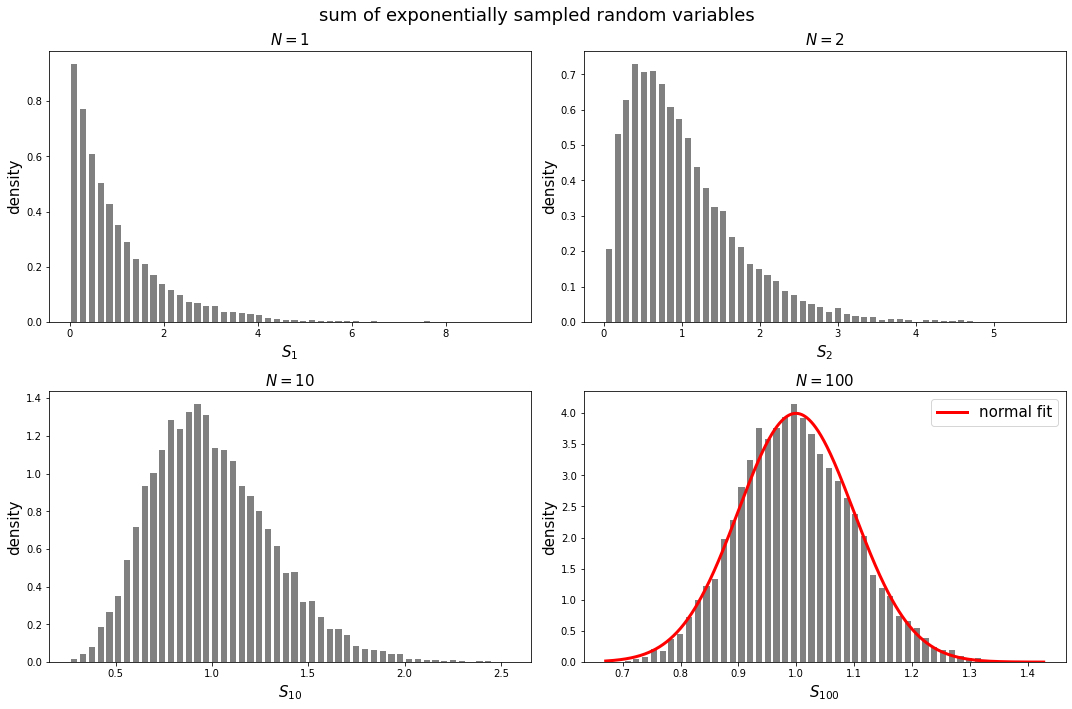

Parameters of fit for N = 100:
	mu_fit = 0.9992958717
	sigma_fit = 0.09983067187030867


In [6]:
S_1, S_2, S_10, S_100 = np.loadtxt("data/exponential.txt", delimiter=',', skiprows=1, unpack = 'True')

fig, ax = plt.subplots(2, 2, figsize=(15,10))
fig.suptitle("sum of exponentially sampled random variables", size=18)

plot_hist(S_1, ax[0,0], N=1, n_bins=n_bins)
plot_hist(S_2, ax[0,1], N=2, n_bins=n_bins)
plot_hist(S_10, ax[1,0], N=10, n_bins=n_bins)
plot_hist(S_100, ax[1,1], N=100, n_bins=n_bins)

# fit case with N=100 terms
mu_fit, sigma_fit = norm.fit(S_100)
x_fit = np.linspace(min(S_100), max(S_100), 1000)
ax[1,1].plot(x_fit, norm.pdf(x_fit, mu_fit, sigma_fit), color='r', linewidth=3, label='normal fit')

fig.tight_layout()
plt.legend(fontsize=15)
plt.show()

print("Parameters of fit for N = 100:" + "\n\t" + "mu_fit = " + str(mu_fit) + "\n\t" + "sigma_fit = " + str(sigma_fit))

Finally, we sample the $x_i$ from a **Lorentzian distribution** with $\mu = 0$ and $\Gamma = 1$. We cannot apply the central limit theorem since it requires that the first two moments of the distriution of the $x_i$ exist. For the Lorentzian distribution, the second momentum is infinity. However, it can still be shown that the sum of Lorentzian random variables described by the parameters $\mu$ and $\Gamma$ has a Lorentzian limiting distribution with the same parameters. Therefore, in the figure below, when we fit the case with $N=100$ with a Lorentzian distribution, we obtain $\mu_{fit} = 0.0093$ and $\Gamma_{fit} = 0.97$, close to what we would expect.

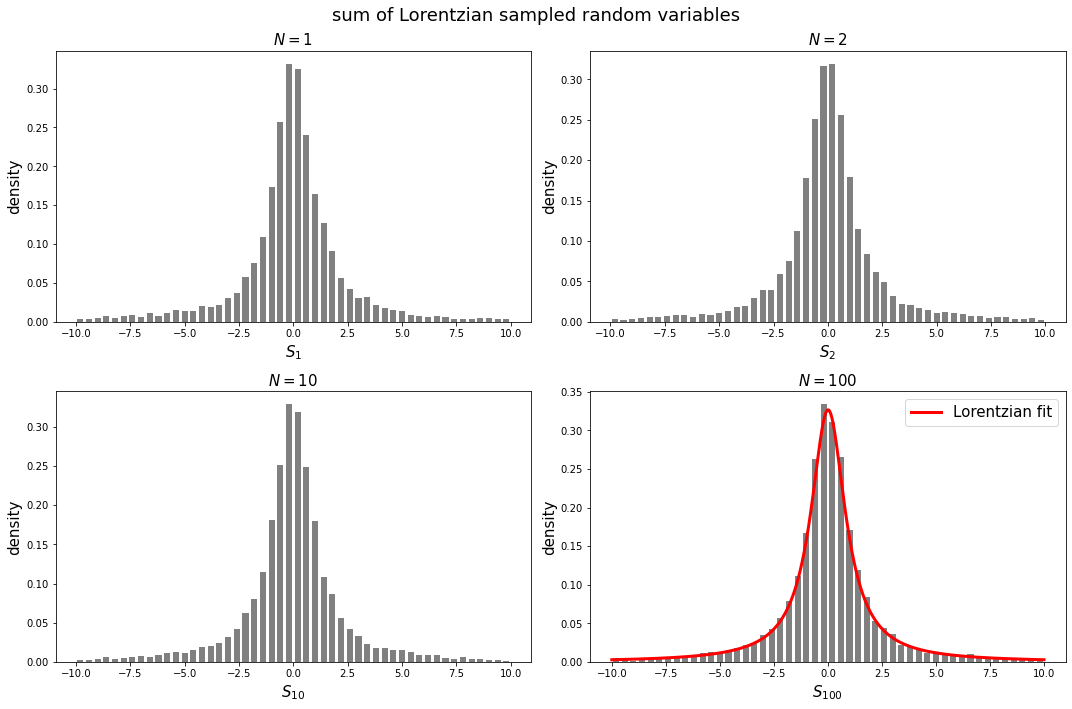

Parameters of fit for N = 100:
	mu_fit = 0.009359709235491922
	gamma_fit = 0.9741853298508925


In [7]:
from scipy.stats import cauchy

S_1, S_2, S_10, S_100 = np.loadtxt("data/lorentzian.txt", delimiter=',', skiprows=1, unpack = 'True')

fig, ax = plt.subplots(2, 2, figsize=(15,10))
fig.suptitle("sum of Lorentzian sampled random variables", size=18)

plot_hist(S_1, ax[0,0], N=1, n_bins=n_bins, range=(-10, 10))
plot_hist(S_2, ax[0,1], N=2, n_bins=n_bins, range=(-10, 10))
plot_hist(S_10, ax[1,0], N=10, n_bins=n_bins, range=(-10, 10))
plot_hist(S_100, ax[1,1], N=100, n_bins=n_bins, range=(-10, 10))

# fit case with N=100 terms
mu_fit, gamma_fit = cauchy.fit(S_100)
x_fit = np.linspace(-10, 10, 1000)
ax[1,1].plot(x_fit, cauchy.pdf(x_fit, mu_fit, gamma_fit), color='r', linewidth=3, label='Lorentzian fit')

fig.tight_layout()
plt.legend(fontsize=15)
plt.show()

print("Parameters of fit for N = 100:" + "\n\t" + "mu_fit = " + str(mu_fit) + "\n\t" + "gamma_fit = " + str(gamma_fit))

### Exercise 01.3

The main component of **Buffon's experiment** is a horizontal plane with straight lines separated by a distance $d$. For the experiment, a needle of length $L$ (with $L < d$) is thrown on the plane. The situation in which the needle intersects with one of the straigth lines is defined as a **hit**. We repeat the experiment $N_{thr}$ times and count the overall number of hits $N_{hit}$. \
It can be shown that these experimental parameters are sufficient to compute an estimate of $\pi$:

$$\pi \approx \frac{2LN_{thr}}{N_{hit}d}.$$

In order to estimate $\pi$ by a simulation, we acknowledge that two straigth lines are sufficient two describe the experiment. The reason for this is that the horizontal plane is translational invariant perpendicular to the straigth lines by a shift of length $d$. In other words, it looks the same if the needle falls between straight line $1$ and straight line $2$ or between straight line $112$ and straight line $113$ because the numbering is arbitrary given that there is an infinite amount of straight lines. 

The throw of the needle can be described by the distance $\Delta x \in [0, d/2)$ betweeen the position of the middle point of the needle and the closest straight line as well as by an angle $\phi \in [0, \pi / 2]$, like in the following image:

<img src="data/experiment1.jpg" width="500" height="600" data-rotate="90">

Therefore, we need to sample $\Delta x$ and $\varphi$ uniformly in the given intervals in order to sample a throw of the needle. Then, we can compute the length $r = \Delta x / \cos(\varphi)$ (see figure) and compare it to half the length of the needle. The criterion for a hit, that is $r \leq L/2$, is:

$$\Delta x \leq \frac{L}{2} \cos(\varphi).$$

It is straightforward to sample $\Delta x$. Since we do not know $\pi$ (the scope of the experiment is to estimate it), we cannot sample $\varphi$ directly. We rather sample $\cos(\varphi) \in [0, 1]$ using the **rejection method**. For this purpose, we sample iteratively two numbers $x, y \in [0, 1)$ uniformly until they fullfill the condition $x^2 + y^2 < 1$. Then, we compute 

$$\cos(\varphi) = \frac{x}{\sqrt{x^2 + y^2}},$$

which is our sample for $\cos(\varphi) \in [0, 1]$. 

In total, we throw the needle $N_{thr, max} = 10^5$ times. We use a needle length of $L = 0.7$ and a distance between the two straight lines of $d=1$ (units are not important here because they cancel out). In the figure below, we visualize the progressive mean $\langle \pi \rangle$ for the estimation of $\pi$ from the simulation as a function of the number of throws $N_{thr}$. The uncertainty is estimated using the blocking method with $N_{max} = 100$ blocks in total. As we can see, the estimation of $\pi$ converges relatively fast to its exact value. As we increase the number of throws/blocks, the uncertainty on the simulated value decreases.

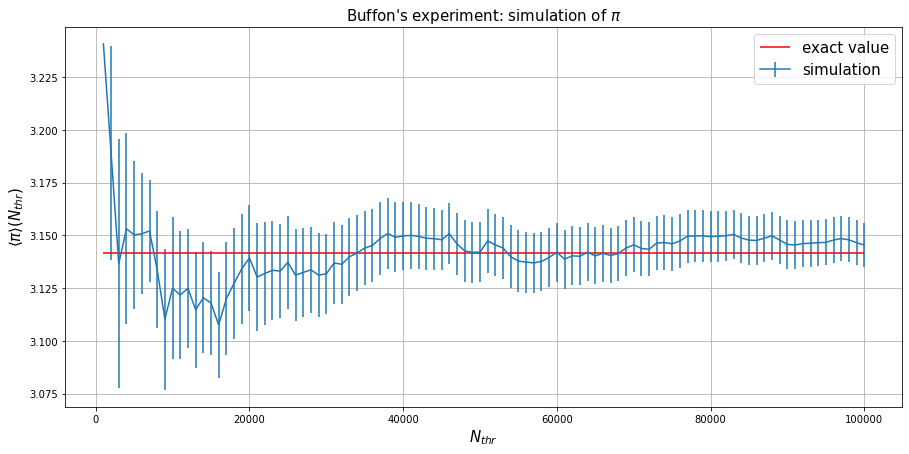

In [14]:
L = 0.7
d = 1
M, hit_rate, hit_rate_error = np.loadtxt("data/pi_buffon.txt", skiprows=1, unpack=True, delimiter=',')
pi = 2*L / d / hit_rate
pi_error = 2*L / (d*hit_rate**2) * hit_rate_error # propagate error on hit_rate on pi estimation

plt.figure(figsize=(15, 7))
plt.errorbar(M, pi, pi_error, label='simulation')
plt.hlines(np.pi, min(M), max(M), color='r', label='exact value')
plt.xlabel(r"$N_{thr}$", size=15)
plt.ylabel(r"$\langle \pi \rangle(N_{thr})$", size=15)
plt.title("Buffon's experiment: simulation of $\pi$", size=15)
plt.legend(fontsize=15)
plt.grid()
plt.show()